# Checking simplified dynamics

In [19]:
using PyCall
using PyPlot
include("Params.jl");
include("SphereConeVehicleModel.jl");

## Design parameters

In [20]:
params = Dict("r_min" => 0.001, # smallest radius of the cone [m]
              "r_max" => 1.30, # largest radius of the cone [m]
              "δ" => 43 / 360 * 2 * pi, # opening angle of the cone [rad]
              "m" => 569.7, # mass of the Phoenix entry system [kg]
              "x_g" => -0.150, # axial center-of-gravity location [m]
              "c" => 1.20, # distance between the radial axis and the cluster of thrusters[m]
              "F_max" => 36.0, # maximum force applied by the thrusters [N]
              "Jxx" => 293.15, # Phoenix entry system [kg.m^2]
              "Jyy" => 184, # Phoenix entry system [kg.m^2]
              "Jzz" => 208.02, # Phoenix entry system [kg.m^2]
              "Jxy" => 0.451, # Phoenix entry system [kg.m^2]
              "Jxz" => -4.424, # Phoenix entry system [kg.m^2] 
              "Jyz" => 0.372, # Phoenix entry system [kg.m^2]
              "g" => 3.711, # Mars gravity [m^2.s^-1]
              "h" => 10800, # Atmospheric Scale Height [m]
              "ρ_0" => 0.020, # Surface density of Mars atmosphere [kg.m^-3]
              "r_p" => 3389.5e3, # Volumetric mean radius of Mars [m]
              "ω_p" => [0, 0, 7.088e-05]) # Angular velocity of Mars [rad.s^-1]
complete_params!(params);

## Simplified Dynamics Model
- We assume flat planet model, gravity acceleration is directed along the x axis.
- We assume constant uniform of the atmosphere.
- We assume that the fluid is static.

In [21]:
# Initial conditions

# Iniitial altitude
x_0 = - 125000.0 - 3389.5e3

# Initial speed
v_0 = 5500 * [1, 0, 0]

# Initial orientation
# q_0 = [1, 0, 0, 0]
q_0 = [0.999, 0, 0, 0.04]
q_0 = q_0 / norm(q_0)
    
# Initial state
X_0 = [x_0, 0, 0, q_0[1], q_0[2], q_0[3], q_0[4], v_0[1], v_0[2], v_0[3], 0, 0, 0]

13-element Array{Float64,1}:
   -3.5145e6            
    0.0                 
    0.0                 
    0.999199360160512   
    0.0                 
    0.0                 
    0.040007982388809295
 5500.0                 
    0.0                 
    0.0                 
    0.0                 
    0.0                 
    0.0                 

## Derivative 

In [22]:
u = zeros(12,1)
X_dot = entry_vehicle_simplified_dynamics(X_0, u, params)

13×1 Array{Float64,2}:
  5500.0                  
     0.0                  
     0.0                  
     0.0                  
     0.0                  
     0.0                  
     0.0                  
 -2622.4899865239677      
    30.47373826407982     
    -3.306096219113628e-10
     8.14040279639931e-15 
    -4.536922414897122e-7 
  -143.9850219982126      

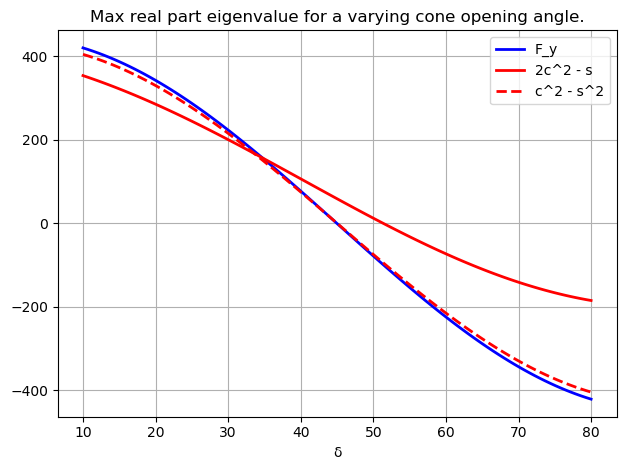

100-element Array{Float64,1}:
  419.4988671375793 
  415.5963069262503 
  411.4401491609392 
  407.03292710032116
  402.37732506752593
  397.47617907784723
  392.33247606447503
  386.94934769152235
  381.3300733341882 
  375.4780749975735 
  369.39691930670614
  363.09030955035394
  356.56208726335177
    ⋮               
 -364.5313690238552 
 -370.83797885070595
 -376.9191346537924 
 -382.77113217824837
 -388.39040672802895
 -393.77353536874193
 -398.91723901119724
 -403.81838441111756
 -408.4739860758702 
 -412.8812080853448 
 -417.0373658141596 
 -420.9399275760251 

In [35]:
function plot_F_y(params, num_nodes; display=true)
    δ_vect = range(10, stop=80, length=num_nodes) / 360 * 2 * pi
    F_y = zeros(num_nodes)
    for i=1:num_nodes
        δ = δ_vect[i]
        params["δ"] = δ
        complete_params!(params)
        F_y[i] = entry_vehicle_simplified_dynamics(X_0, u, params)[9]
        
    end
    plot(δ_vect.*(360/2/pi), F_y, color="blue", linewidth=2.0, linestyle="-", label="F_y")
    plot(δ_vect.*(360/2/pi), 200*(2*cos.(δ_vect).^2 - sin.(δ_vect)), color="red", linewidth=2.0, linestyle="-", label="2c^2 - s")
    plot(δ_vect.*(360/2/pi), 430*(cos.(δ_vect).^2 - sin.(δ_vect).^2), color="red", linewidth=2.0, linestyle="--", label="c^2 - s^2")
    legend()
    xlabel("δ")
    title("Max real part eigenvalue for a varying cone opening angle.")
    grid("on")
    if display 
        tight_layout()
        show()
    end
    return F_y
end

num_nodes = 100
plot_F_y(params, num_nodes)